In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('bank_churn_data.xlsx')
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [5]:
data.isna().sum()

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [6]:
data.dropna(inplace=True, how='any')

<AxesSubplot:xlabel='Status', ylabel='count'>

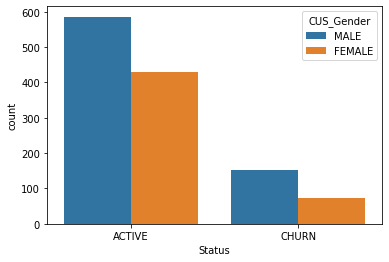

In [7]:
sns.countplot(x = data['Status'], hue = data['CUS_Gender'])

In [8]:
data.Status.value_counts()

ACTIVE    1015
CHURN      223
Name: Status, dtype: int64

In [9]:
data.rename(columns={'# total debit transactions for S1': 'total_debit_tran_s1', 
                     '# total debit transactions for S2': 'total_debit_tran_s2', 
                     '# total debit transactions for S3': 'total_debit_tran_s3',
                     '# total credit transactions for S1': 'total_cred_trans_s1', 
                     '# total credit transactions for S2': 'total_cred_trans_s2', 
                     '# total credit transactions for S3': 'total_cred_trans_s3'}, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

data['Status'] = le.fit_transform(data['Status'])


In [12]:
data.drop(['CIF','CUS_DOB', 'CUS_Customer_Since'], axis = 1, inplace=True)

In [13]:
data.Status.value_counts()

0    1015
1     223
Name: Status, dtype: int64

In [14]:
data_minor = data[data['Status']==1]
data_major = data[data['Status']==0]

from sklearn.utils import resample

data_minor_upsampled = resample(data_minor, replace = True, n_samples = 1015, random_state = 42)

data_upsampled = pd.concat([data_major, data_minor_upsampled], axis = 0)

In [15]:
data_upsampled.Status.value_counts()

0    1015
1    1015
Name: Status, dtype: int64

In [16]:
df=data_upsampled.sample(frac=1).reset_index(drop=True)

In [17]:
df.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total_debit_tran_s1,total_debit_tran_s2,total_debit_tran_s3,total debit amount for S1,total debit amount for S2,total debit amount for S3,total_cred_trans_s1,total_cred_trans_s2,total_cred_trans_s3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,48,3750000.0,FEMALE,SINGLE,14,40,48,33,50302.37,72102.31,52603.27,13,21,12,57657.88,78986.72,59854.68,175007.95,121,196499.28,46,167,2223,LOW,0
1,53,10000000.0,MALE,SINGLE,14,3,17,52,4209.00,38719.60,25762.00,10,8,7,115439.00,109058.00,92939.00,68690.60,72,317436.00,25,97,2223,LOW,0
2,43,2000000.0,MALE,SINGLE,14,5,14,20,5311.83,57480.30,57354.85,0,0,0,0.00,0.00,0.00,120146.98,39,0.00,0,39,2223,LOW,0
3,43,486.0,MALE,SINGLE,14,1,1,0,3657.91,175.00,0.00,0,1,0,0.00,84356.94,0.00,3832.91,2,84356.94,1,3,2222,MIDLE,0
4,27,180000.0,FEMALE,SINGLE,14,0,7,1,0.00,72143.60,500.00,0,2,0,0.00,12000.00,0.00,72643.60,8,12000.00,2,10,2222,MIDLE,1


In [18]:
df.CUS_Marital_Status.value_counts()

SINGLE     1506
MARRIED     469
DIVORCE      37
WIDOWED      16
OTHER         1
PARTNER       1
Name: CUS_Marital_Status, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

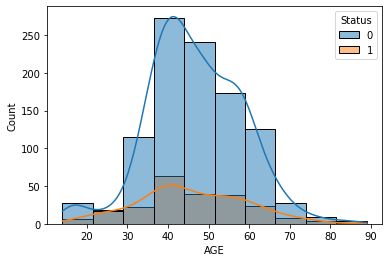

In [19]:
sns.histplot(x = data['AGE'], hue = data['Status'], bins= 10, kde = True)

<AxesSubplot:xlabel='CUS_Gender', ylabel='AGE'>

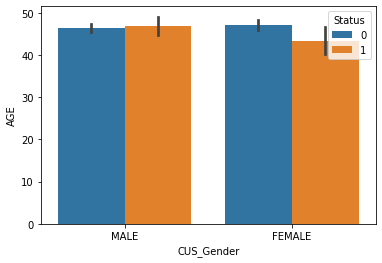

In [20]:
sns.barplot(x = data['CUS_Gender'], y = data['AGE'], hue = data['Status'])

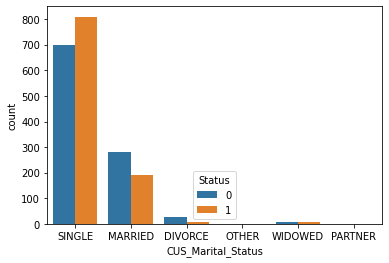

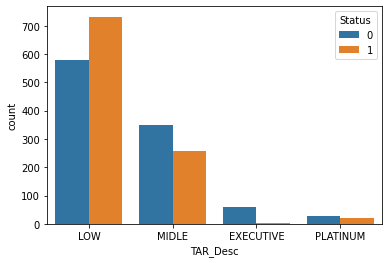

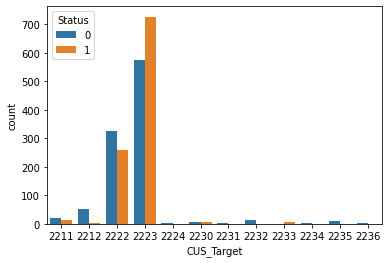

In [21]:
for i, predictor in enumerate(data[['CUS_Marital_Status', 'TAR_Desc', 'CUS_Target']]):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Status')

In [22]:
data_dummies = pd.get_dummies(df)

In [23]:
data_dummies.head()

,AGE,CUS_Month_Income,YEARS_WITH_US,total_debit_tran_s1,total_debit_tran_s2,total_debit_tran_s3,total debit amount for S1,total debit amount for S2,total debit amount for S3,total_cred_trans_s1,total_cred_trans_s2,total_cred_trans_s3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,Status,CUS_Gender_FEMALE,CUS_Gender_MALE,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED,TAR_Desc_EXECUTIVE,TAR_Desc_LOW,TAR_Desc_MIDLE,TAR_Desc_PLATINUM
0,48,3750000.0,14,40,48,33,50302.37,72102.31,52603.27,13,21,12,57657.88,78986.72,59854.68,175007.95,121,196499.28,46,167,2223,0,1,0,0,0,0,0,1,0,0,1,0,0
1,53,10000000.0,14,3,17,52,4209.00,38719.60,25762.00,10,8,7,115439.00,109058.00,92939.00,68690.60,72,317436.00,25,97,2223,0,0,1,0,0,0,0,1,0,0,1,0,0
2,43,2000000.0,14,5,14,20,5311.83,57480.30,57354.85,0,0,0,0.00,0.00,0.00,120146.98,39,0.00,0,39,2223,0,0,1,0,0,0,0,1,0,0,1,0,0
3,43,486.0,14,1,1,0,3657.91,175.00,0.00,0,1,0,0.00,84356.94,0.00,3832.91,2,84356.94,1,3,2222,0,0,1,0,0,0,0,1,0,0,0,1,0
4,27,180000.0,14,0,7,1,0.00,72143.60,500.00,0,2,0,0.00,12000.00,0.00,72643.60,8,12000.00,2,10,2222,1,1,0,0,0,0,0,1,0,0,0,1,0


<AxesSubplot:>

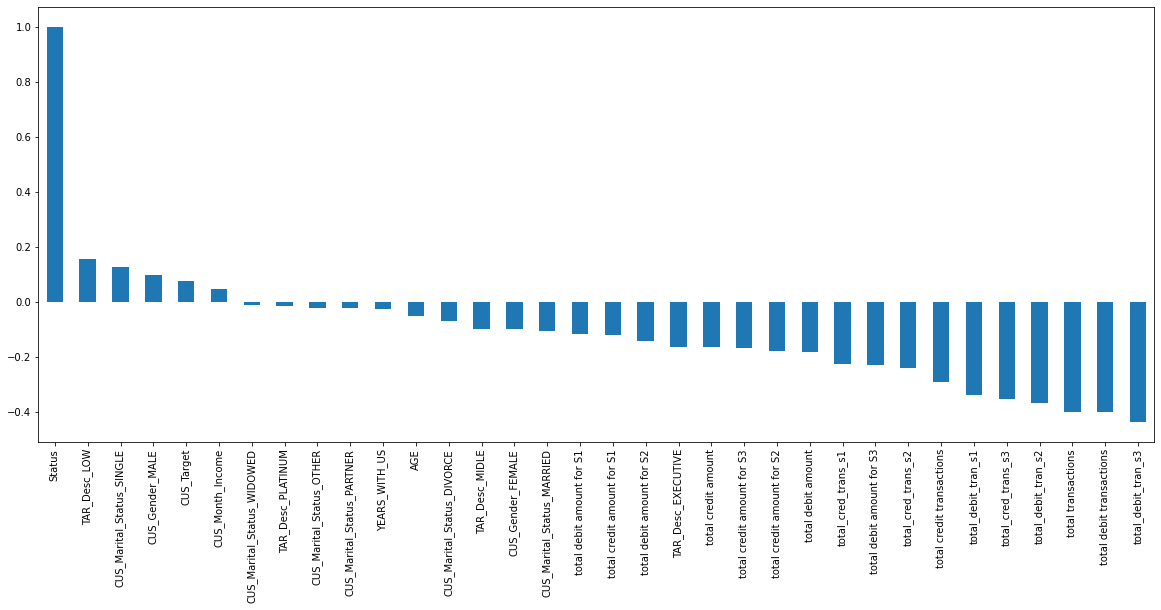

In [24]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Status'].sort_values(ascending = False).plot(kind='bar')

* **HIGH** churn rate can be seen with **TAR_Desc_LOW, CUS_Marital_Status_Single, CUS_Gender_Male**
* **LOW** churn rate can be seen in with the **total_debit_tran_s3, total_transactions and total debit transaction**.
* Factors like **CUST_Status_OTHER, CUS_Marital_Status_PARTNER** have almost no impact on churn.

Text(0.5, 1.0, 'Total Transactions by churn')

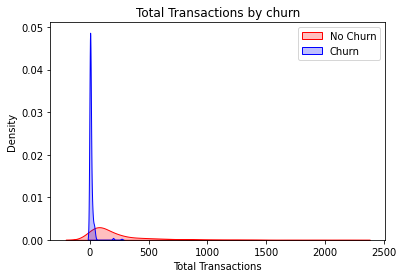

In [25]:
#credit transaction vs total transactions
Tot = sns.kdeplot(data_dummies['total transactions'][(data_dummies["Status"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data_dummies['total credit transactions'][(data_dummies["Status"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Transactions')
Tot.set_title('Total Transactions by churn')

Text(0.5, 1.0, 'Total charges by churn')

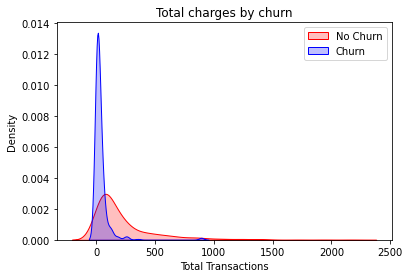

In [26]:
Tot = sns.kdeplot(data_dummies['total transactions'][(data_dummies["Status"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data_dummies['total debit transactions'][(data_dummies["Status"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Transactions')
Tot.set_title('Total charges by churn')

<AxesSubplot:>

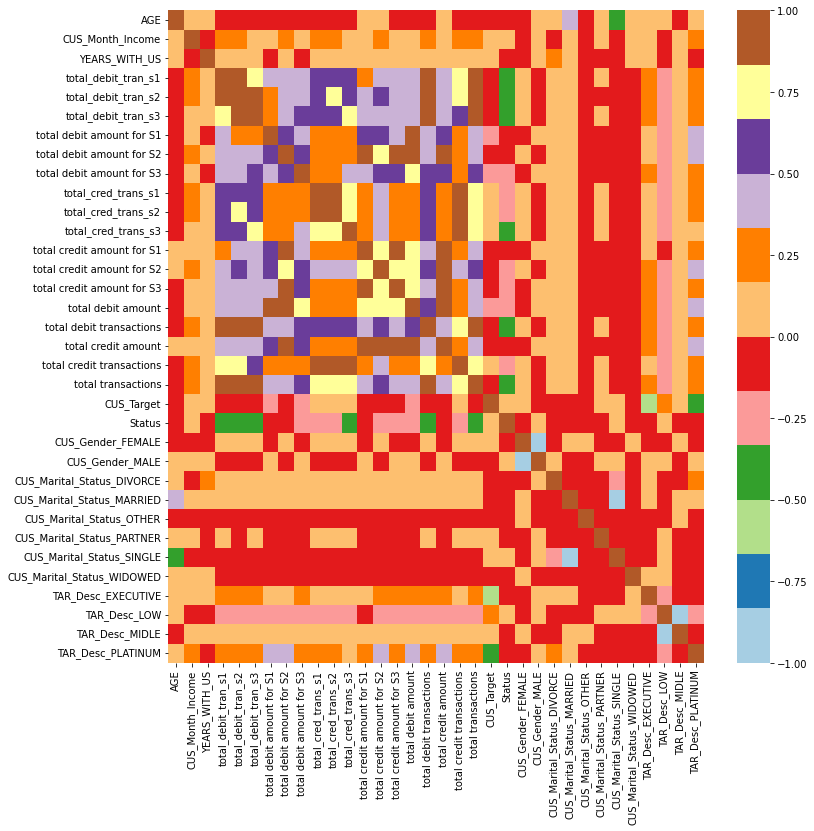

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

In [28]:
new_df1_target0=df.loc[df["Status"]==0]
new_df1_target1=df.loc[df["Status"]==1]

In [29]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

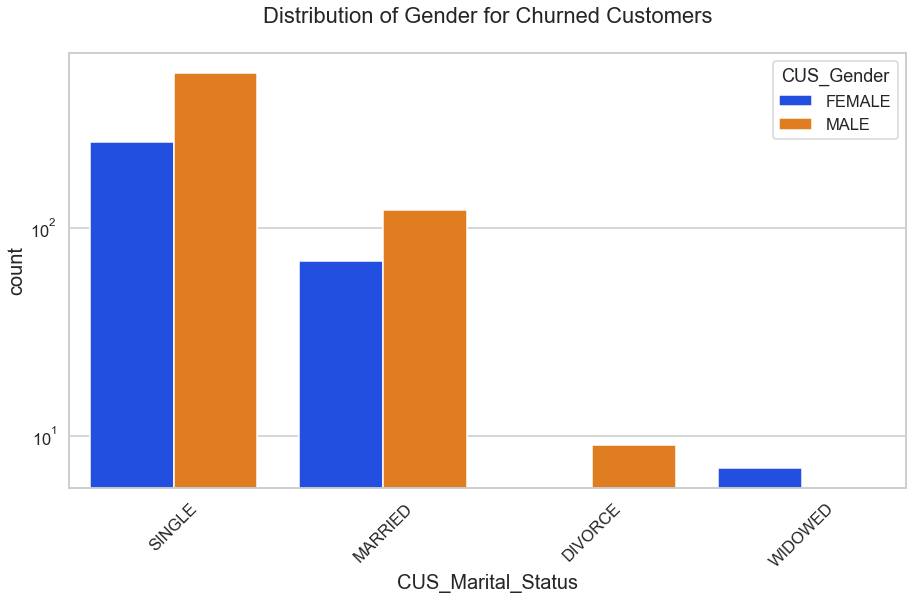

In [30]:
uniplot(new_df1_target1,col='CUS_Marital_Status',
        title='Distribution of Gender for Churned Customers',
        hue='CUS_Gender')

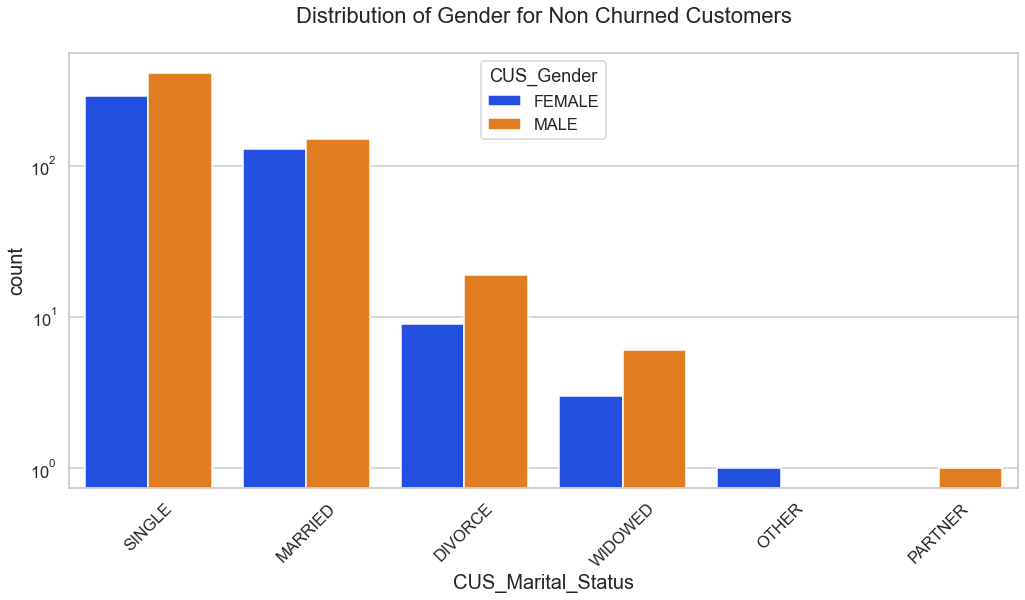

In [31]:
uniplot(new_df1_target0,col='CUS_Marital_Status',
        title='Distribution of Gender for Non Churned Customers',
        hue='CUS_Gender')

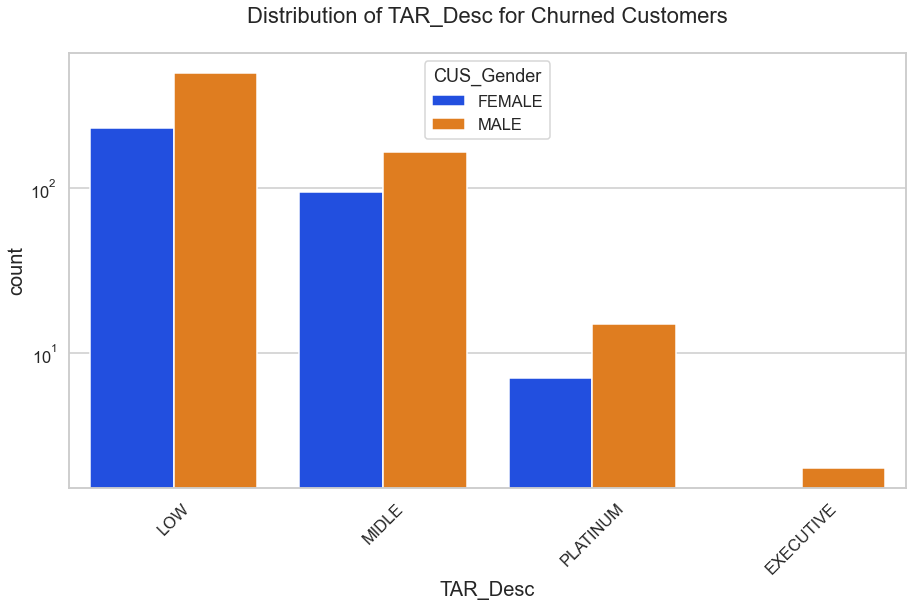

In [32]:
uniplot(new_df1_target1,col='TAR_Desc',
        title='Distribution of TAR_Desc for Churned Customers',
        hue='CUS_Gender')

<AxesSubplot:xlabel='total transactions', ylabel='CUS_Month_Income'>

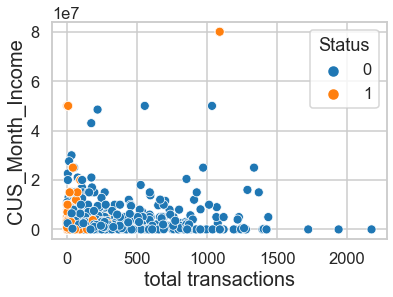

In [33]:
sns.scatterplot(data=data_dummies, x='total transactions', y='CUS_Month_Income', hue = 'Status')

### Conclusion

1. Single Male are highest Churners
2. Customers with TAR_Desc:LOW are among the higher side churners
3. Customers with more transactions on debit_transactions_s3 are not likely to churn
4. Customer with TAR_Desc : PLATINUM are not likely to churn.
5. Customers with lesser than 100 to 150 credit and debit transactions are churners.
6. Customer with lesser income are mostly likely to churn

In [35]:
df.to_csv('bank_churn_data_exp.csv', index= False)